In [1]:
import cvxpy as cv
import numpy as np
import random as rd
import time
import matplotlib.pyplot as plt

def create_rd_problem(n, m, total, name ,min_value = 1 , max_value = 15): #m es la cantidad de filas (trabajadores)
    C = []
    for i in range(total):
        array = []
        #name_ = name.split('.')[0] +f"{i+1}." + name.split('.')[1]
        file = open(name, "w")
        text = ['int: m;',
                'int: n;',
                'array[1..m, 1..n] of int: c;',
                f'm = {m};',
                f'n = {n};',
                'c =',
                'array[1..m, 1..n] of var 0..1: x;',
                'var int: ct;',
                'constraint ct = sum(i in 1..m, j in 1..n) (x[i,j]*c[i,j]);',
                'constraint forall (i in 1..m)',
                '(sum(j in 1..n) (x[i,j]) = 1);',
                'constraint forall (j in 1..n)',
                '(sum(i in 1..m) (x[i,j]) = 1);',
                'solve minimize ct;']
        for i in range(m+1):
            line = ''
            row = []
            for j in range(n):
                number = rd.randint(min_value, max_value)
                row.append(number)
                line += f"{number}, "
            array.append(row)
            if i == 0:
                line = line.strip(' ').strip(',')
                text.insert(6 + i, f"[|{line}")

            elif i == m-1:
                line = line.strip(' ').strip(',')
                text.insert(6 + i, f"|{line}")
            elif i == m:
                text.insert(6 + i, "|];")
            else:
                line = line.strip(' ')
                text.insert(6 + i, f"|{line}")

        for line in text:
            file.write(f"{line}\n")
        file.close()
        C.append(array[ : -1])
    return C

def create_py_problem(W, n):
    X = cv.Variable((n , n), integer = True)
    rest = []

    for i in range(n):
        v = np.zeros((n, 1))
        u = np.ones((n, 1))
        v[i] = 1
        rest.append( v.T @ X @ u == 1)
        rest.append( u.T @ X @ v == 1)
        if i == 0:
            s = v.T @ W @ X.T @ v
        else:
            s += v.T @ W @ X.T @ v

    obj = cv.Minimize(s)

    rest.append(X >= 0)
    rest.append(X <= 1)

    problem = cv.Problem(obj, rest)
    problem.solve()
    return [X.value, problem.value]

In [2]:
times_nxn = []
nxn_s = [i for i in range(1,30)]
for n in nxn_s:
    s = []
    for i in range(10):
        problems = create_rd_problem(n, n, 1,f"{n}x{n}.mzn" ,min_value = 1, max_value = 100)
        W = np.array(problems[0])
        t_0 = time.process_time()
        create_py_problem(W, n)
        t_f = time.process_time()
        s.append(t_f-t_0)
    times_nxn.append(np.mean(s))

In [3]:
times_nxn_minizinc = [0.133, 0.128, 0.137, 0.133, 0.134, 0.143, 0.133, 0.140, 0.151, 0.154,
                      0.173, 0.179, 0.192, 0.349, 2.192, 2.424, 12.980, 5.159, 107.0, 12.640,
                      458.0, 1091,]

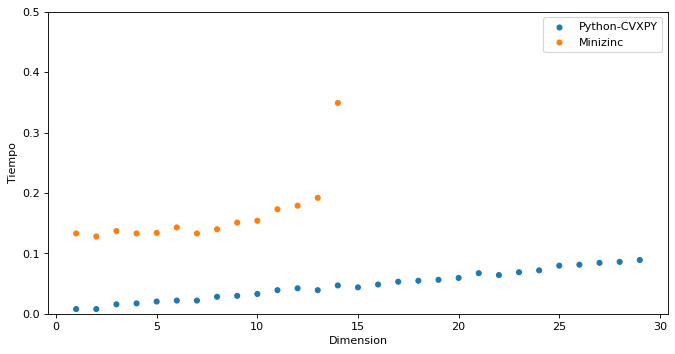

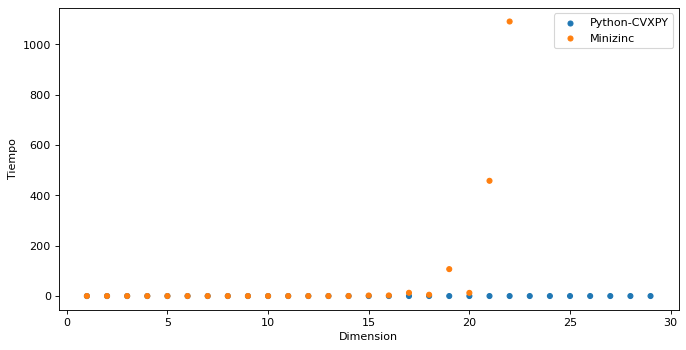

In [4]:
plt.figure(figsize=(10, 5), dpi=80)
plt.scatter(nxn_s, times_nxn, s = [20 for i in range(29)], label = "Python-CVXPY")
plt.scatter(nxn_s[:22], times_nxn_minizinc, s = [20 for i in range(22)], label = "Minizinc")
plt.xlabel("Dimension")
plt.ylabel("Tiempo")
plt.ylim([0,0.5])
plt.legend()
plt.show()

plt.figure(figsize=(10, 5), dpi=80)
plt.scatter(nxn_s, times_nxn, s = [20 for i in range(29)], label = "Python-CVXPY")
plt.scatter(nxn_s[:22], times_nxn_minizinc, s = [20 for i in range(22)], label = "Minizinc")
plt.xlabel("Dimension")
plt.ylabel("Tiempo")
plt.legend()
plt.show()

In [5]:
n = 10
times_rg = []
rg_s = [10*i for i in range(1,21)]
for rg in rg_s:
    s = []
    for i in range(10):
        problems = create_rd_problem(n, n, 1,f"rg_max_{rg}.mzn" ,min_value = 1, max_value = rg)
        W = np.array(problems[0])
        t_0 = time.process_time()
        create_py_problem(W, n)
        t_f = time.process_time()
        s.append(t_f-t_0)
    times_rg.append(np.mean(s))

In [6]:
times_rg_minizinc = [0.186, 0.152, 0.152, 0.151, 0.161, 0.157, 0.159, 0.141, 0.152, 0.146,
                      0.160, 0.147, 0.142, 0.182, 0.155, 0.147, 0.153, 0.151, 0.145, 0.145]

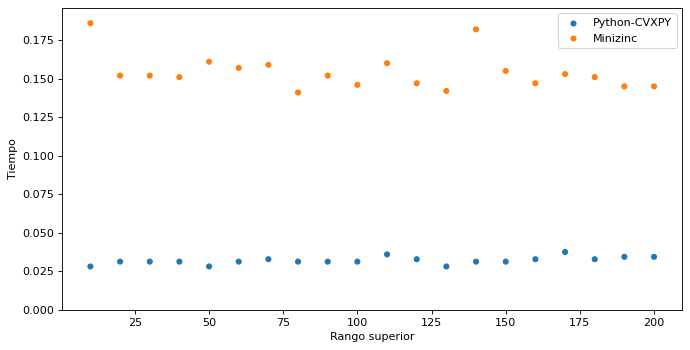

In [7]:
plt.figure(figsize=(10, 5), dpi=80)
plt.scatter(rg_s, times_rg, s = [20 for i in range(20)], label = "Python-CVXPY")
plt.scatter(rg_s, times_rg_minizinc, label = "Minizinc", s = [20 for i in range(20)])
plt.ylim([0, max(max(times_rg), max(times_rg_minizinc))+0.01])
plt.xlabel("Rango superior")
plt.ylabel("Tiempo")
plt.legend()
plt.show()

In [8]:
n = 10
times_rg_inf = []
rg_s = [10*i for i in range(1,21)]
for rg in rg_s:
    s = []
    for i in range(10):
        problems = create_rd_problem(n, n, 1,f"rg_min_{rg}.mzn" ,min_value = rg, max_value = 210)
        W = np.array(problems[0])
        t_0 = time.process_time()
        create_py_problem(W, n)
        t_f = time.process_time()
        s.append(t_f-t_0)
    times_rg_inf.append(np.mean(s))

In [9]:
times_rg_inf_minizinc = [0.172, 0.218, 0.267, 0.238, 0.375, 0.461, 0.971, 1.808, 2.143, 1.909,
                         3.346, 4.233, 4.994, 6.158, 6.832, 7.693, 10.137, 10.504, 10.492, 10.616]

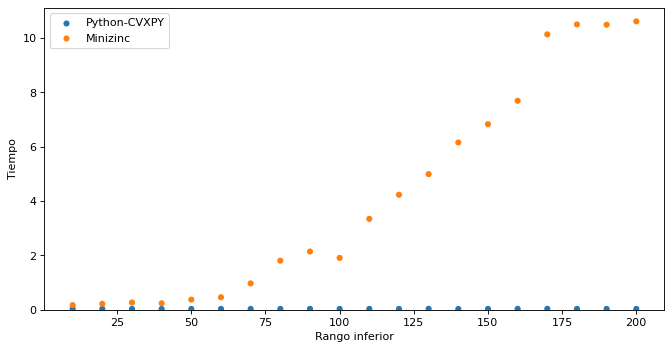

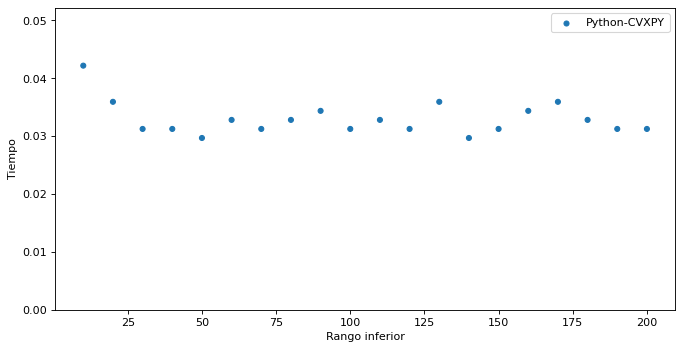

In [10]:
plt.figure(figsize=(10, 5), dpi=80)
plt.scatter(rg_s, times_rg_inf, s = [20 for i in range(20)], label = "Python-CVXPY")
plt.scatter(rg_s, times_rg_inf_minizinc, label = "Minizinc", s = [20 for i in range(20)])
plt.ylabel("Tiempo")
plt.xlabel("Rango inferior")
plt.ylim([0, max(max(times_rg_inf), max(times_rg_inf_minizinc))+0.5])
plt.legend()
plt.show()

plt.figure(figsize=(10, 5), dpi=80)
plt.scatter(rg_s, times_rg_inf, s = [20 for i in range(20)], label = "Python-CVXPY")
plt.ylabel("Tiempo")
plt.xlabel("Rango inferior")
plt.ylim([0, max(times_rg_inf)+0.01])
plt.legend()
plt.show()

In [11]:
n = 10
times_rg_fijo = []
rg_s = [20*i for i in range(1,21)]
for rg in rg_s:
    s = []
    for i in range(10):
        problems = create_rd_problem(n, n, 1,f"rg_fijo_{rg}.mzn" ,min_value = 150 + rg, max_value = rg + 210)
        W = np.array(problems[0])
        t_0 = time.process_time()
        create_py_problem(W, n)
        t_f = time.process_time()
        s.append(t_f-t_0)
    times_rg_fijo.append(np.mean(s))

In [12]:
times_rg_fijo_minizinc = [7.181, 7.955, 8.932, 9.282, 10.431, 9.627, 10.363, 10.516, 10.458, 10.814,
                          10.516, 10.544, 10.568, 10.529, 10.627, 10.625, 10.495, 10.992, 10.606, 10.558]

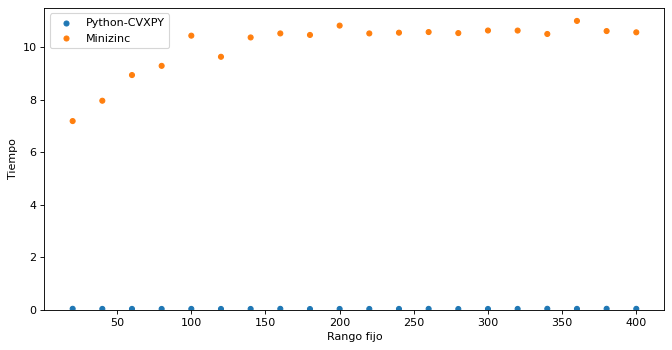

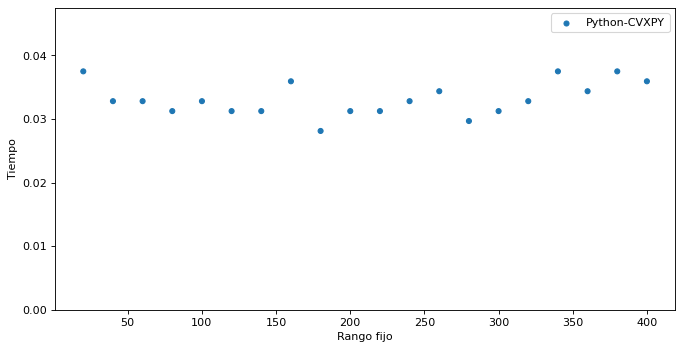

In [13]:
plt.figure(figsize=(10, 5), dpi=80)
plt.scatter(rg_s, times_rg_fijo, s = [20 for i in range(20)], label = "Python-CVXPY")
plt.scatter(rg_s, times_rg_fijo_minizinc, label = "Minizinc", s = [20 for i in range(20)])
plt.ylabel("Tiempo")
plt.xlabel("Rango fijo")
plt.ylim([0, max(max(times_rg_inf), max(times_rg_fijo_minizinc))+0.5])
plt.legend()
plt.show()

plt.figure(figsize=(10, 5), dpi=80)
plt.scatter(rg_s, times_rg_fijo, s = [20 for i in range(20)], label = "Python-CVXPY")
plt.ylabel("Tiempo")
plt.xlabel("Rango fijo")
plt.ylim([0, max(times_rg_fijo)+0.01])
plt.legend()
plt.show()